### Asthma is the most common chronic condition in children and affects nearly 1 in 10 children.

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load the Data

In [2]:
df = pd.read_csv("../Dataset/asthama-data.csv")
df

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


#### Cleaning the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Tiredness                316800 non-null  int64
 1   Dry-Cough                316800 non-null  int64
 2   Difficulty-in-Breathing  316800 non-null  int64
 3   Sore-Throat              316800 non-null  int64
 4   None_Sympton             316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   None_Experiencing        316800 non-null  int64
 9   Age_0-9                  316800 non-null  int64
 10  Age_10-19                316800 non-null  int64
 11  Age_20-24                316800 non-null  int64
 12  Age_25-59                316800 non-null  int64
 13  Age_60+                  316800 non-null  int64
 14  Gender_Female            316800 non-

In [4]:
df.dtypes

Tiredness                  int64
Dry-Cough                  int64
Difficulty-in-Breathing    int64
Sore-Throat                int64
None_Sympton               int64
Pains                      int64
Nasal-Congestion           int64
Runny-Nose                 int64
None_Experiencing          int64
Age_0-9                    int64
Age_10-19                  int64
Age_20-24                  int64
Age_25-59                  int64
Age_60+                    int64
Gender_Female              int64
Gender_Male                int64
Severity_Mild              int64
Severity_Moderate          int64
Severity_None              int64
dtype: object

In [5]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index([], dtype='object')

In [6]:
for column in df.columns:
    print(f"Column: {column}")
    # Print the unique values for the column
    print(df[column].unique())

Column: Tiredness
[1 0]
Column: Dry-Cough
[1 0]
Column: Difficulty-in-Breathing
[1 0]
Column: Sore-Throat
[1 0]
Column: None_Sympton
[0 1]
Column: Pains
[1 0]
Column: Nasal-Congestion
[1 0]
Column: Runny-Nose
[1 0]
Column: None_Experiencing
[0 1]
Column: Age_0-9
[1 0]
Column: Age_10-19
[0 1]
Column: Age_20-24
[0 1]
Column: Age_25-59
[0 1]
Column: Age_60+
[0 1]
Column: Gender_Female
[0 1]
Column: Gender_Male
[1 0]
Column: Severity_Mild
[1 0]
Column: Severity_Moderate
[0 1]
Column: Severity_None
[0 1]


In [7]:
X = df.drop(['Severity_None','Severity_Mild','Severity_Moderate'],axis='columns')
X

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
316796,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
316797,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
316798,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [8]:
# Check for null values in the DataFrame
null_values = X.isnull().any()

# Loop through each column with null values
for column in null_values[null_values].index:
    # Replace null values with 0
    X[column].fillna(0, inplace=True)

In [9]:
df.isnull().sum()

Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
dtype: int64

In [11]:
X.dtypes

Tiredness                  int64
Dry-Cough                  int64
Difficulty-in-Breathing    int64
Sore-Throat                int64
None_Sympton               int64
Pains                      int64
Nasal-Congestion           int64
Runny-Nose                 int64
None_Experiencing          int64
Age_0-9                    int64
Age_10-19                  int64
Age_20-24                  int64
Age_25-59                  int64
Age_60+                    int64
Gender_Female              int64
Gender_Male                int64
dtype: object

#### Data Visualisation

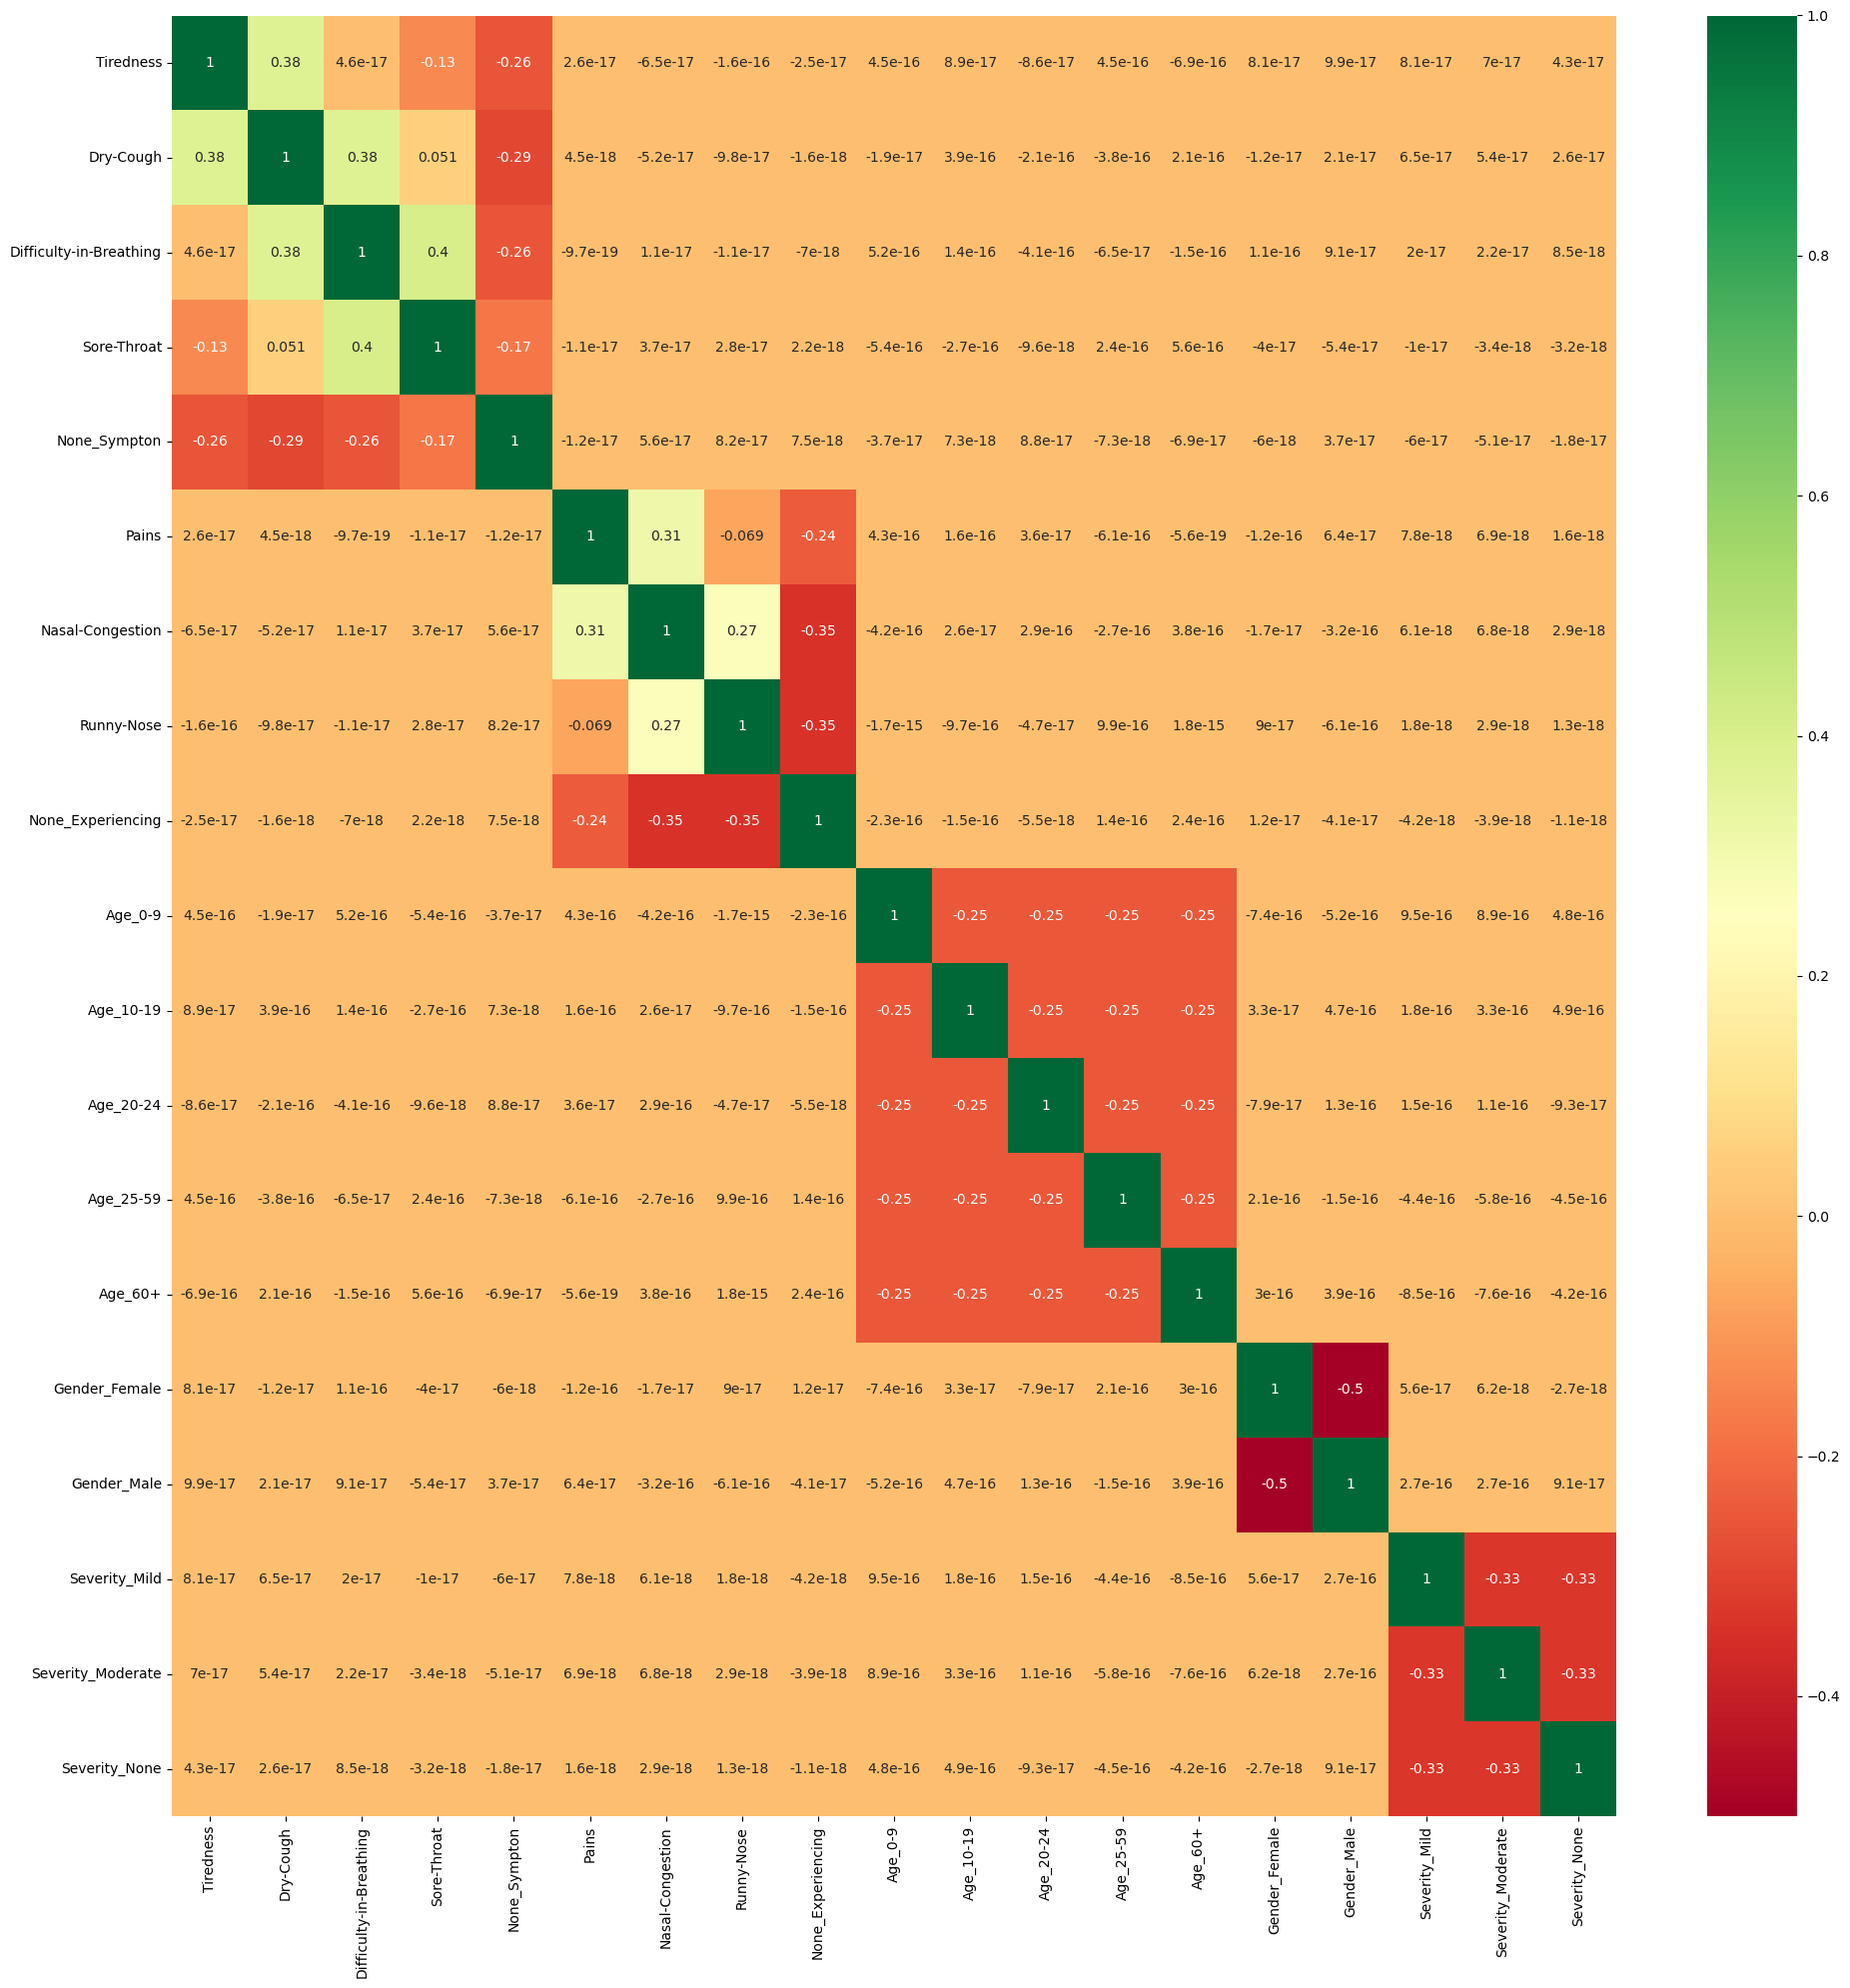

In [12]:
plt.figure(figsize=(20,20))
ax=sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.tight_layout()
plt.show()

In [13]:
symptoms = ['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion', 'Runny-Nose']
symptom_counts = df[symptoms].sum()
symptom_counts

Tiredness                  158400
Dry-Cough                  178200
Difficulty-in-Breathing    158400
Sore-Throat                 99000
Pains                      115200
Nasal-Congestion           172800
Runny-Nose                 172800
dtype: int64

In [14]:
age_groups = ['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+']
age_distribution = df[age_groups].sum()
age_distribution

Age_0-9      63360
Age_10-19    63360
Age_20-24    63360
Age_25-59    63360
Age_60+      63360
dtype: int64

In [15]:
gender_groups = ['Gender_Female', 'Gender_Male']
gender_distribution = df[gender_groups].sum()
gender_distribution

Gender_Female    105600
Gender_Male      105600
dtype: int64

In [16]:
severity_levels = ['Severity_Mild', 'Severity_Moderate', 'Severity_None']
severity_distribution = df[severity_levels].sum()
severity_distribution

Severity_Mild        79200
Severity_Moderate    79200
Severity_None        79200
dtype: int64

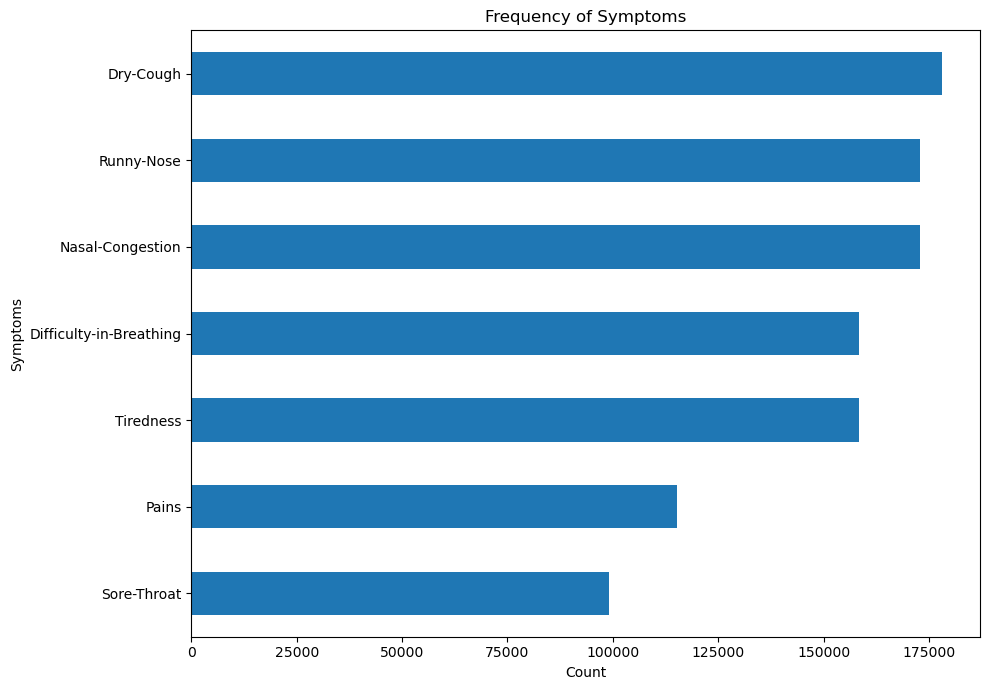

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))
                       
# Plotting the counts of symptoms as a horizontal bar plot
symptom_counts.sort_values().plot(kind='barh')

ax.set_title('Frequency of Symptoms')
ax.set_xlabel('Count')
ax.set_ylabel('Symptoms')
plt.tight_layout()
plt.show()

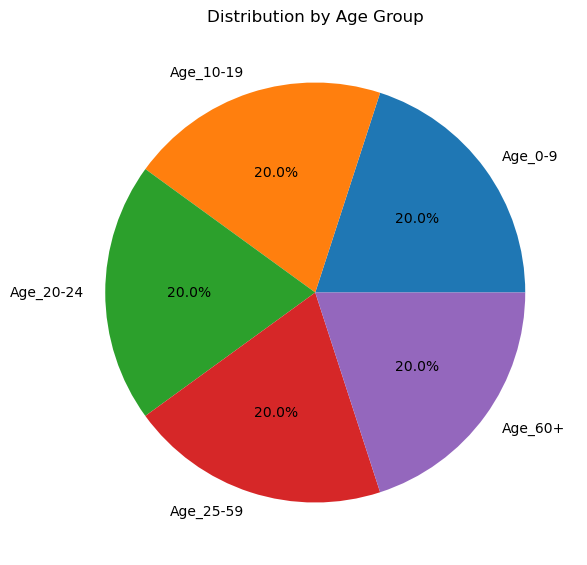

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
age_distribution.plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Distribution by Age Group')
ax.set_ylabel('')  
plt.tight_layout()
plt.show()

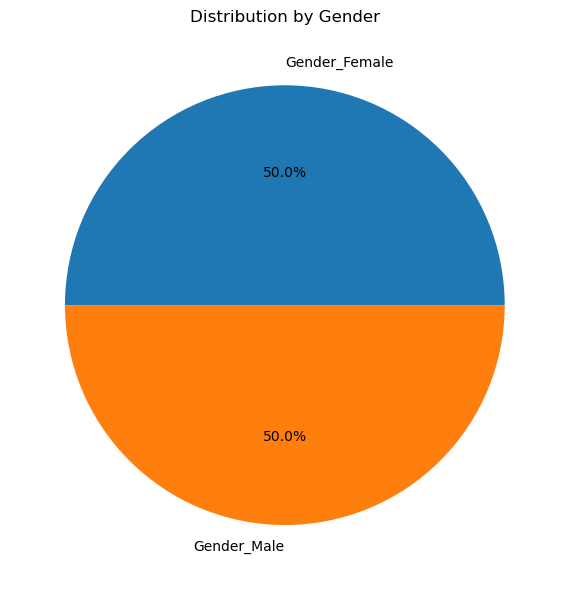

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Distribution by Gender')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

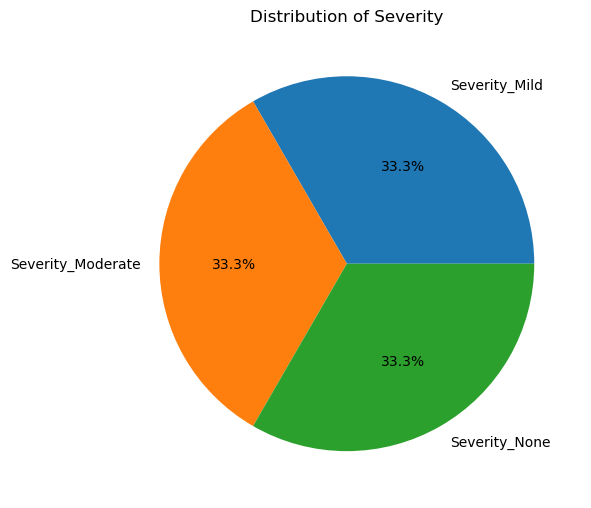

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))
severity_distribution.plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Distribution of Severity')
ax.set_ylabel('')  
plt.tight_layout()
plt.show()

In [21]:
y = df['Severity_None']
y

0         0
1         0
2         0
3         0
4         0
         ..
316795    0
316796    0
316797    1
316798    1
316799    1
Name: Severity_None, Length: 316800, dtype: int64

#### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
print('X_train: ', len(X_train))
print('X_test:', len(X_test))

X_train:  237600
X_test: 79200


In [24]:
from collections import Counter
Counter(y_train)

Counter({0: 178152, 1: 59448})

In [25]:
Counter(y_test)

Counter({0: 59448, 1: 19752})

### KNN Model

#### Building the Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

#### Training the Model

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

#### Finding Performance Metrics

In [28]:
ypred=knn.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ac=accuracy_score(y_test,ypred)
cm=confusion_matrix(y_test,ypred)
cr=classification_report(y_test,ypred)

print(f"{ac}\n\n{cm}\n\n{cr}")

0.7041035353535353

[[54115  5333]
 [18102  1650]]

              precision    recall  f1-score   support

           0       0.75      0.91      0.82     59448
           1       0.24      0.08      0.12     19752

    accuracy                           0.70     79200
   macro avg       0.49      0.50      0.47     79200
weighted avg       0.62      0.70      0.65     79200



Text(95.72222222222221, 0.5, 'Truth')

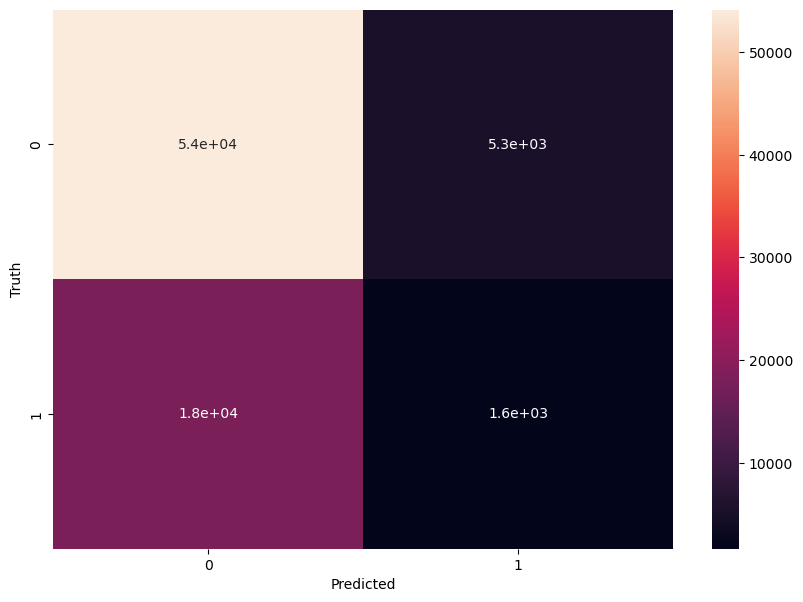

In [31]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Saving a model

In [33]:
import pickle
filename = 'asthma.sav'
pickle.dump(knn, open(filename, 'wb'))

In [38]:
x = [[0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1]]
knn.predict(x)

array([0])

### Random Forest Model

#### Building the Model

In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

#### Training the Model

In [43]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

#### Finding Performance Metrics

In [44]:
y_hat = model.predict(X_test)

In [45]:
accuracy_score(y_test, y_hat)

0.7506060606060606

In [46]:
classification_report(y_test, y_hat)

'              precision    recall  f1-score   support\n\n           0       0.75      1.00      0.86     59448\n           1       0.00      0.00      0.00     19752\n\n    accuracy                           0.75     79200\n   macro avg       0.38      0.50      0.43     79200\nweighted avg       0.56      0.75      0.64     79200\n'